Predict the persor say truth or bluff

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
dataset = pd.read_csv('Position_Salaries.csv')

X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [14]:
# Here also we dont use splitting because we use all data for trainig model


# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

Feature Scaling

In [15]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


In [16]:
# Here we use feature scaling

# The feature scaling can able to apply for both dependent variable and the features

from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
# The standard scaler requires 2D array, the y in 1 D so we need to conver that

# The mean of the X and y are diff , so we need to create individual object

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

print(X)
print()
print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training SVR model

In [19]:
from sklearn.svm import SVR

# The gaussian RBF kernal - fromula - google it
# Kernal functions - google it

# radial basis function kernal - rbf
regressor = SVR(kernel ='rbf')

regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting new result (Reverse feature scaling)

In [20]:
# the reshape just used to avoid some format error

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))


array([[170370.0204065]])

Visualizing the SVR result

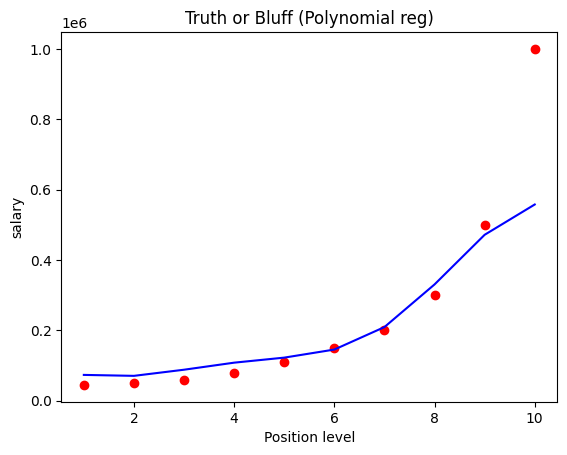

In [23]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)) , color = 'blue')
plt.title('Truth or Bluff (Polynomial reg)')
plt.xlabel ('Position level')
plt.ylabel('salary')
plt.show()

High ressolution smoother curve

<ipython-input-28-44b561efa5ec>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


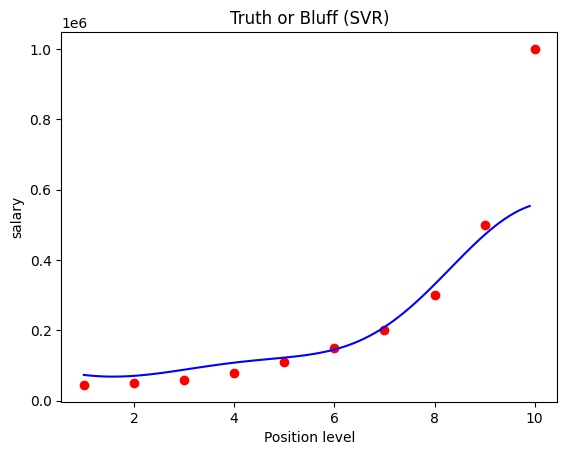

In [28]:
# This code gives more smoother curve

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel ('Position level')
plt.ylabel('salary')
plt.show()